### inputs


In [11]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

### Manual Histogram Equalization (HistogramEqualize)

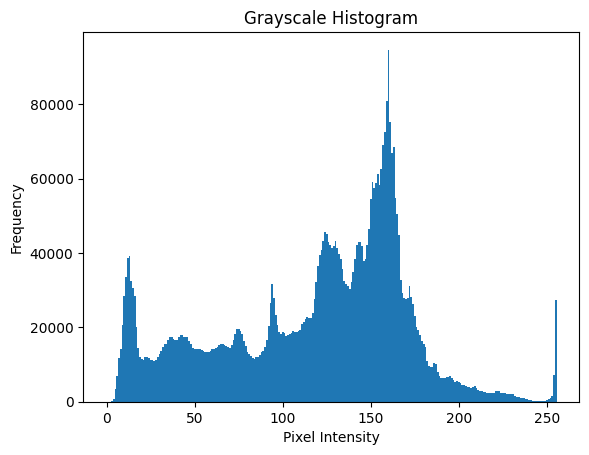

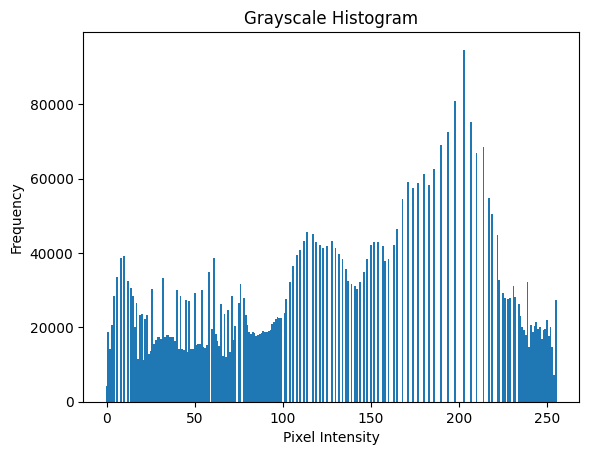

In [ ]:
path = "images\\sample.jpg" # modify this path based project directory

img = Image.open(path)
img = img.convert("L")  # Convert to grayscale

def histogram(image, show_plot = False):
    width, height = image.size
    hist = [0] * 256
    
    for y in range(height):
        for x in range(width):
            pixel_value = image.getpixel((x, y))
            hist[pixel_value] += 1
    
    if show_plot:
        plt.bar(range(256), hist, width=1.0)
        plt.title("Grayscale Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.show()
    
    return hist

def HistogramEqualize(image, show_plot = False):
    hist = histogram(image) # N_k
    width, height = image.size

    pdf = [h / (height * width) for h in hist] # probability of each pixel value ( P(r_k) )

    cdf = [0] * 256 
    cdf[0] = pdf[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + pdf[i]

    S_k = [round(i * 255) for i in cdf]

    N_S_k = [0] * 256 # new equalized histogram
    for i in range(len(S_k)):
        N_S_k[S_k[i]] += hist[i]

    if show_plot:
        plt.bar(range(256), N_S_k, width=1.0)
        plt.title("Grayscale Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.show()

    new_image = Image.new("L", image.size)

    for y in range(height):
        for x in range(width):
            pixel_value = image.getpixel((x, y))
            new_pixel_value = S_k[pixel_value]
            new_image.putpixel((x, y), new_pixel_value)
    
    return new_image

# Original image Histogram
histogram(img, show_plot = True)
img.show()
# img.save("images\\image1.jpg")

equalized_img = HistogramEqualize(img, show_plot = True)

equalized_img.show()
# equalized_img.save("images\\equalized_image1.jpg")

### Compare HistogramEqualize vs. cv2.equalizeHist vs. CLAHE

In [ ]:
# modify paths based on the project directory to run properly
src_path = "images\\"

HE_path = "output\\my_code\\"
cv2_path = "output\\cv2\\"
CLAHE_path = "output\\CLAHE\\"

for i in range(1, 7):
    source_path = src_path + str(i) + ".jpg"
    # HistogramEqualize
    img = Image.open(source_path)
    img = img.convert("L") 
    equalized_img = HistogramEqualize(img)
    equalized_img.save(HE_path + "HE-" + str(i) + ".jpg")

    # OpenCV
    cv2_img = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)
    cv2_img = cv2.equalizeHist(cv2_img)
    cv2.imwrite(cv2_path + "cv2-" + str(i) + ".jpg", cv2_img)

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    CLAHE_img = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)
    CLAHE_img = clahe.apply(CLAHE_img)
    cv2.imwrite(CLAHE_path + "CLAHE-" + str(i) + ".jpg", CLAHE_img)


## Part-5
problem 5 on project PDF file

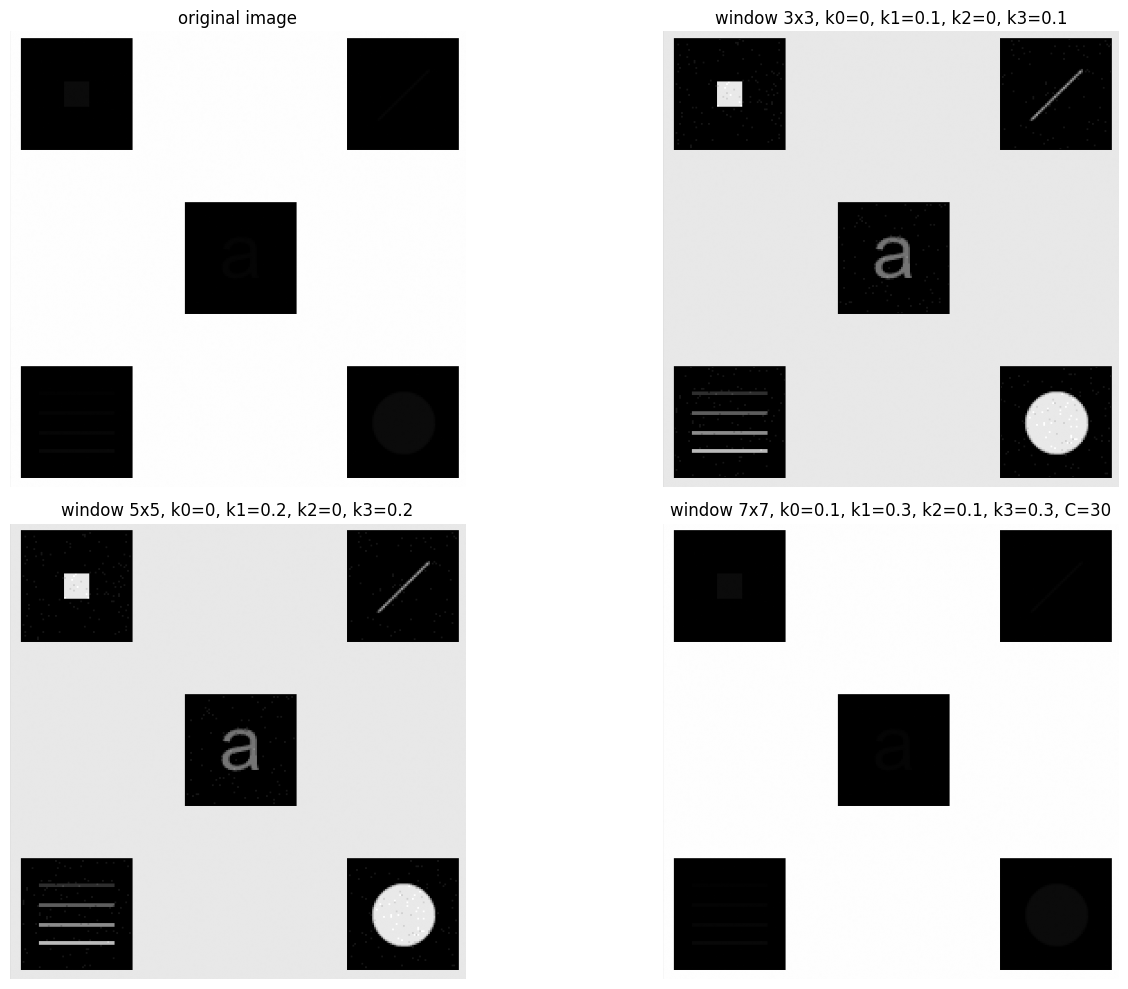

In [ ]:
def local_histogram_enhancement(image, window_size=3, k0=0.0, k1=0.1, k2=0.0, k3=0.1, C=None):
    
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    m_G = np.mean(image)
    sigma_G = np.std(image)
    
    if C is None:
        max_image = np.max(image)
        max_area = 10 
        C = max_image / max_area
    
    enhanced = np.zeros_like(image, dtype=np.float32)
    rows, cols = image.shape
    
    pad = window_size // 2
    padded = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    
    for i in range(pad, rows + pad):
        for j in range(pad, cols + pad):

            window = padded[i-pad:i+pad+1, j-pad:j+pad+1]
            
            m_Sxy = np.mean(window)
            sigma_Sxy = np.std(window)
            
            
            if (k0 * m_G <= m_Sxy <= k1 * m_G) and (k2 * sigma_G <= sigma_Sxy <= k3 * sigma_G):
                enhanced[i-pad, j-pad] = C * image[i-pad, j-pad]
            else:
                enhanced[i-pad, j-pad] = image[i-pad, j-pad]
    
    enhanced = np.clip(enhanced, 0, 255)
    return enhanced.astype(np.uint8)

image = cv2.imread("images\\part_5.png", cv2.IMREAD_GRAYSCALE) # modify paths based on the project directory to run properly

enhanced1 = local_histogram_enhancement(image, window_size=3, k0=0, k1=0.1, k2=0, k3=0.1)
enhanced2 = local_histogram_enhancement(image, window_size=5, k0=0, k1=0.2, k2=0, k3=0.2)
enhanced3 = local_histogram_enhancement(image, window_size=7, k0=0.1, k1=0.3, k2=0.1, k3=0.3, C=30)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('original image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(enhanced1, cmap='gray')
plt.title('window 3x3, k0=0, k1=0.1, k2=0, k3=0.1')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(enhanced2, cmap='gray')
plt.title('window 5x5, k0=0, k1=0.2, k2=0, k3=0.2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(enhanced3, cmap='gray')
plt.title('window 7x7, k0=0.1, k1=0.3, k2=0.1, k3=0.3, C=30')
plt.axis('off')

plt.tight_layout()
plt.show()